In [43]:
import numpy as np
import pandas as pd
from sklearn import linear_model, metrics, model_selection, svm
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.font_manager import FontProperties
import seaborn as sns
%matplotlib inline

matplotlib.rcParams.update({'font.size': 18})

In [40]:
cars=pd.read_csv('Cleaned Carvana.csv')


In [41]:
lst=[]
for brand,x in cars['BRAND'].value_counts().iteritems():
    lst.append(brand)
    
print(lst)

['CHEVROLET', 'FORD', 'JEEP', 'BUICK', 'KIA', 'NISSAN', 'HYUNDAI', 'VOLKSWAGEN', 'GMC', 'TOYOTA', 'DODGE', 'HONDA', 'CADILLAC', 'SUBARU', 'LEXUS', 'BMW']


In [4]:
year=cars.groupby('YEAR').sum()

del year['PAGE']
del year['ENTRY']

In [5]:
year['AVG_PRICE']=year.apply(lambda row: row['PRICE']/row['dummy'],axis=1)
year['AVG_MILEAGE']=year.apply(lambda row: row['MILES']/row['dummy'],axis=1)

In [6]:
year.reset_index(inplace=True)

In [7]:
year.to_csv('export datasets/Carvana cars by year.csv',index=False)

C:\Users\16142\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


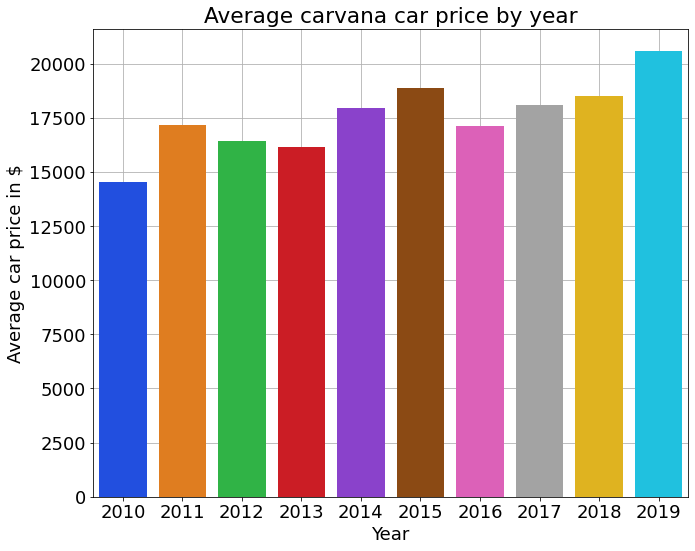

In [44]:
#drop 2020, 1 expensive sports car, outlier from regular fare that carvana offers.



palette=sns.color_palette('bright',10)
fig, ax = plt.subplots(figsize=(10,8))
ax=sns.barplot(x='YEAR',y='AVG_PRICE',data=year.drop([10]),palette=palette)

ax.set_title('Average carvana car price by year')
ax.set_xlabel('Year')
ax.set_ylabel('Average car price in $')
ax.xaxis.grid()
ax.yaxis.grid()
ax.set_axisbelow(True)

fig.tight_layout()
fig.show()
fig.savefig('Figures/figure 1 - average carvana car price by year.tif',dpi=300)

as expected across all cars, brands (and makes and trims) price decreases as car age increases. Interesting that the older cars(10 years old!) are asking for 15k still. lets look at a scatter plot.

In [9]:
cars.loc[cars['YEAR']==2020]
#index of single 2020 car is 7837

,YEAR,BRAND,PAGE,ENTRY,PRICE,MILES,SHIPPING,dummy,CHEVROLET,FORD,...,DODGE,HONDA,GMC,SUBARU,INFINITI,MAZDA,CADILLAC,FIAT,LEXUS,BMW
7718,2020,TOYOTA,449,2,54900,1061,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


C:\Users\16142\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


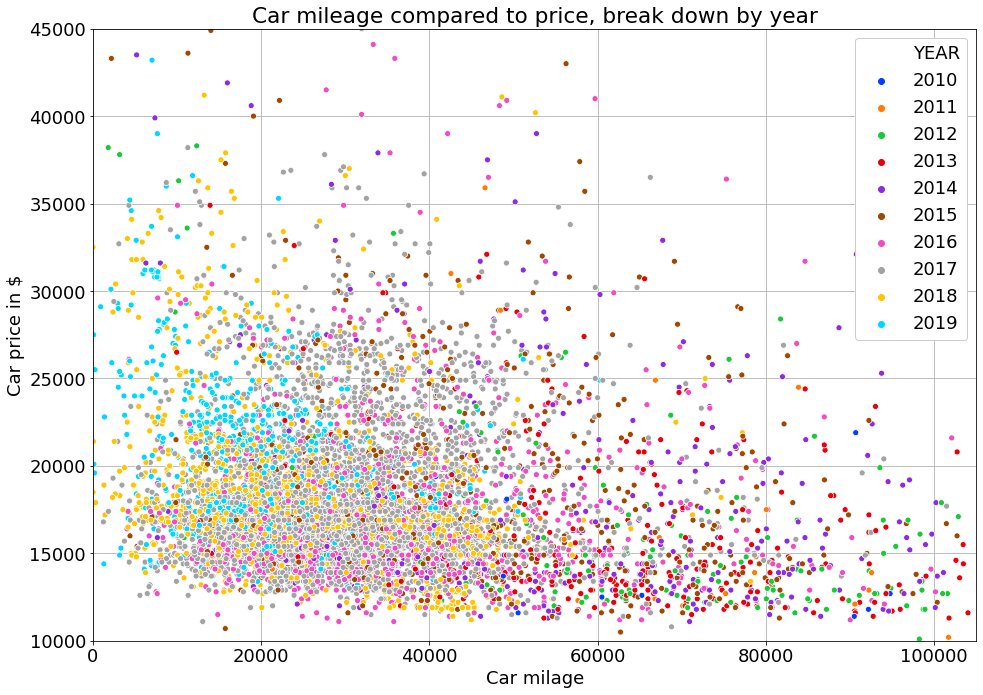

In [10]:

fig, ax = plt.subplots(figsize=(14,10))
palette=sns.color_palette('bright',10)
ax=sns.scatterplot(x='MILES',y='PRICE',data=cars.drop([7718]),hue='YEAR',palette=palette,legend='full')

ax.set_title('Car mileage compared to price, break down by year')
ax.set_xlabel('Car milage')
ax.set_ylabel('Car price in $')
ax.xaxis.grid()
ax.yaxis.grid()
ax.set_xlim([0,105000])
ax.set_ylim([10000,45000])
ax.set_axisbelow(True)
ax.legend(facecolor='white',framealpha=1)
fig.tight_layout()
fig.show()

fig.savefig('Figures/figure 2 - Car mileage compared to price by Year.tif')

In [11]:
cars['YEAR'].value_counts()
lst2=[]
lst2=list(range(2010,2020,1))

print(lst2)

[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]


C:\Users\16142\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


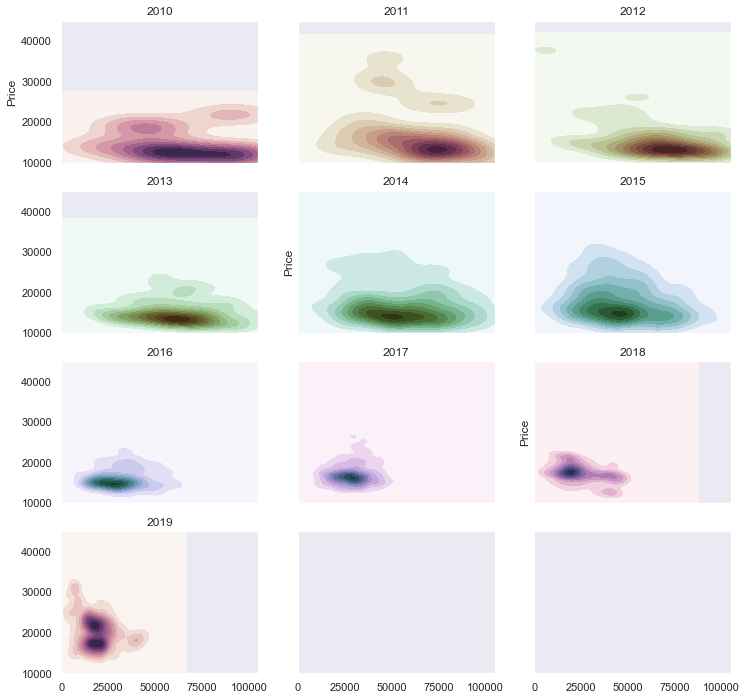

In [12]:
n=0
s=np.linspace(0,3,10)

sns.set(style='dark')
fig, axes = plt.subplots(4,3, figsize=(12,12),sharex=True,sharey=True)

for x in lst2:
    ax=axes.flat[n]
    
    cmap= sns.cubehelix_palette(start=s[n],light=1, as_cmap=True)
    
    testx=cars.loc[cars['YEAR']==x]['MILES']
    testy=cars.loc[cars['YEAR']==x]['PRICE']
    sns.kdeplot(testx,testy,cmap=cmap,ax=ax,shade=True)
    ax.set_xlim([0,105000])
    ax.set_ylim([10000,45000])
    ax.set_title(x)
    
    if n%4==0:
        ax.set_ylabel('Price')
    else:
        ax.set_ylabel('')
    
    if n == 12 or n == 13 or n == 14 or n == 15:
        ax.set_xlabel('Mileage')
    else:
        ax.set_xlabel('')
    
    n+=1

fig.show()
fig.savefig('Figures/figure 2.b - Car mileage compared to price by Year breakdown.tif',dpi=150)

can 'broadly' see regions that associate. lower mileage newer year, higher mileage older year. prices are quite mixed.

lets look at Brand instead of year.

C:\Users\16142\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


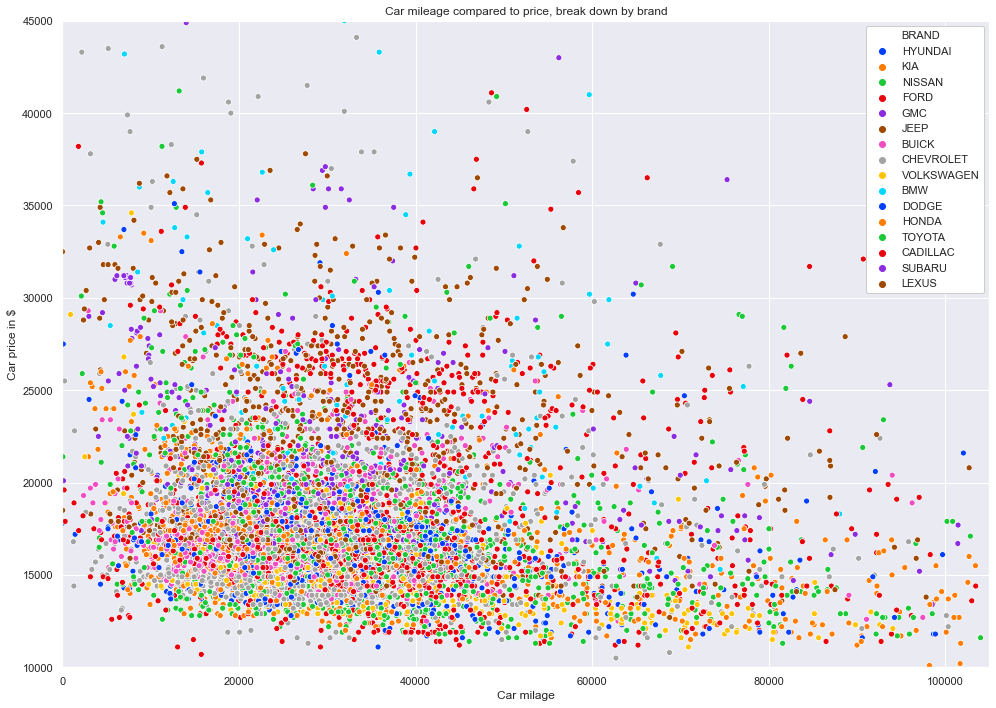

In [13]:

fig, ax = plt.subplots(figsize=(14,10))
palette=sns.color_palette('bright',len(cars['BRAND'].value_counts()))
ax=sns.scatterplot(x='MILES',y='PRICE',data=cars.drop([2652,7837]),hue='BRAND',palette=palette,legend='full')

ax.set_title('Car mileage compared to price, break down by brand')
ax.set_xlabel('Car milage')
ax.set_ylabel('Car price in $')
ax.xaxis.grid()
ax.yaxis.grid()
ax.set_xlim([0,105000])
ax.set_ylim([10000,45000])
ax.set_axisbelow(True)
ax.legend(facecolor='white',framealpha=1)
fig.tight_layout()
fig.show()

fig.savefig('Figures/figure 3 - Car mileage compared to price by Brand.tif')

C:\Users\16142\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


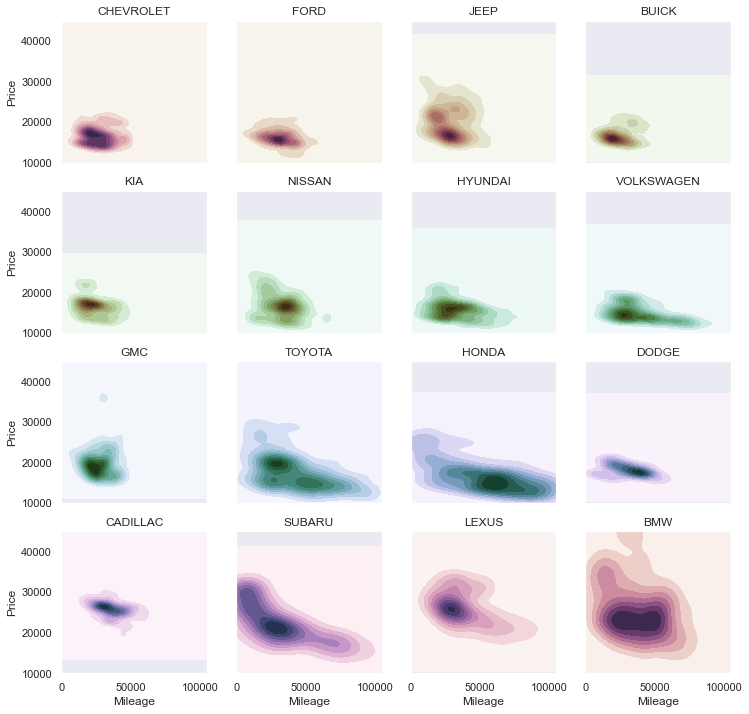

In [14]:
n=0
s=np.linspace(0,3,16)

sns.set(style='dark')
fig, axes = plt.subplots(4,4, figsize=(12,12),sharex=True,sharey=True)

for x in lst:
    ax=axes.flat[n]
    
    cmap= sns.cubehelix_palette(start=s[n],light=1, as_cmap=True)
    
    testx=cars.loc[cars['BRAND']==x]['MILES']
    testy=cars.loc[cars['BRAND']==x]['PRICE']
    sns.kdeplot(testx,testy,cmap=cmap,ax=ax,shade=True)
    ax.set_xlim([0,105000])
    ax.set_ylim([10000,45000])
    ax.set_title(x)
    
    if n%4==0:
        ax.set_ylabel('Price')
    else:
        ax.set_ylabel('')
    
    if n == 12 or n == 13 or n == 14 or n == 15:
        ax.set_xlabel('Mileage')
    else:
        ax.set_xlabel('')
    
    n+=1

fig.show()
fig.savefig('Figures/figure 3.b - Car mileage compared to price by Brand breakdown.tif',dpi=150)

again, pretty mixed, all brands offer a selection of different cars with varying price tags.

how many of each brand?

In [17]:
brands=cars.groupby('BRAND').sum()
brands=brands.reset_index()
brands

,BRAND,YEAR,PAGE,ENTRY,PRICE,MILES,SHIPPING,dummy,CHEVROLET,FORD,...,DODGE,HONDA,GMC,SUBARU,INFINITI,MAZDA,CADILLAC,FIAT,LEXUS,BMW
0,BMW,217707,25577,1163,2910400,3947439,7200,108,0,0,...,0,0,0,0,0,0,0,0,0,108
1,BUICK,1528711,155131,7872,13159050,20405922,48800,758,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CADILLAC,409358,44686,2146,5273200,7914485,17600,203,0,0,...,0,0,0,0,0,0,203,0,0,0
3,CHEVROLET,3604290,400070,18700,31034900,51520999,125900,1787,1787,0,...,0,0,0,0,0,0,0,0,0,0
4,DODGE,484199,62814,2687,4499590,7841661,28300,240,0,0,...,240,0,0,0,0,0,0,0,0,0
5,FORD,2462456,292131,12936,20826490,43214761,84200,1221,0,1221,...,0,0,0,0,0,0,0,0,0,0
6,GMC,703920,80875,3567,7185500,10731295,21800,349,0,0,...,0,0,349,0,0,0,0,0,0,0
7,HONDA,483483,65237,2406,4114440,12450123,28900,240,0,0,...,0,240,0,0,0,0,0,0,0,0
8,HYUNDAI,849063,104130,4440,6711100,14668894,46700,421,0,0,...,0,0,0,0,0,0,0,0,0,0
9,JEEP,1803058,199884,9339,18525640,27463983,74699,894,0,0,...,0,0,0,0,0,0,0,0,0,0


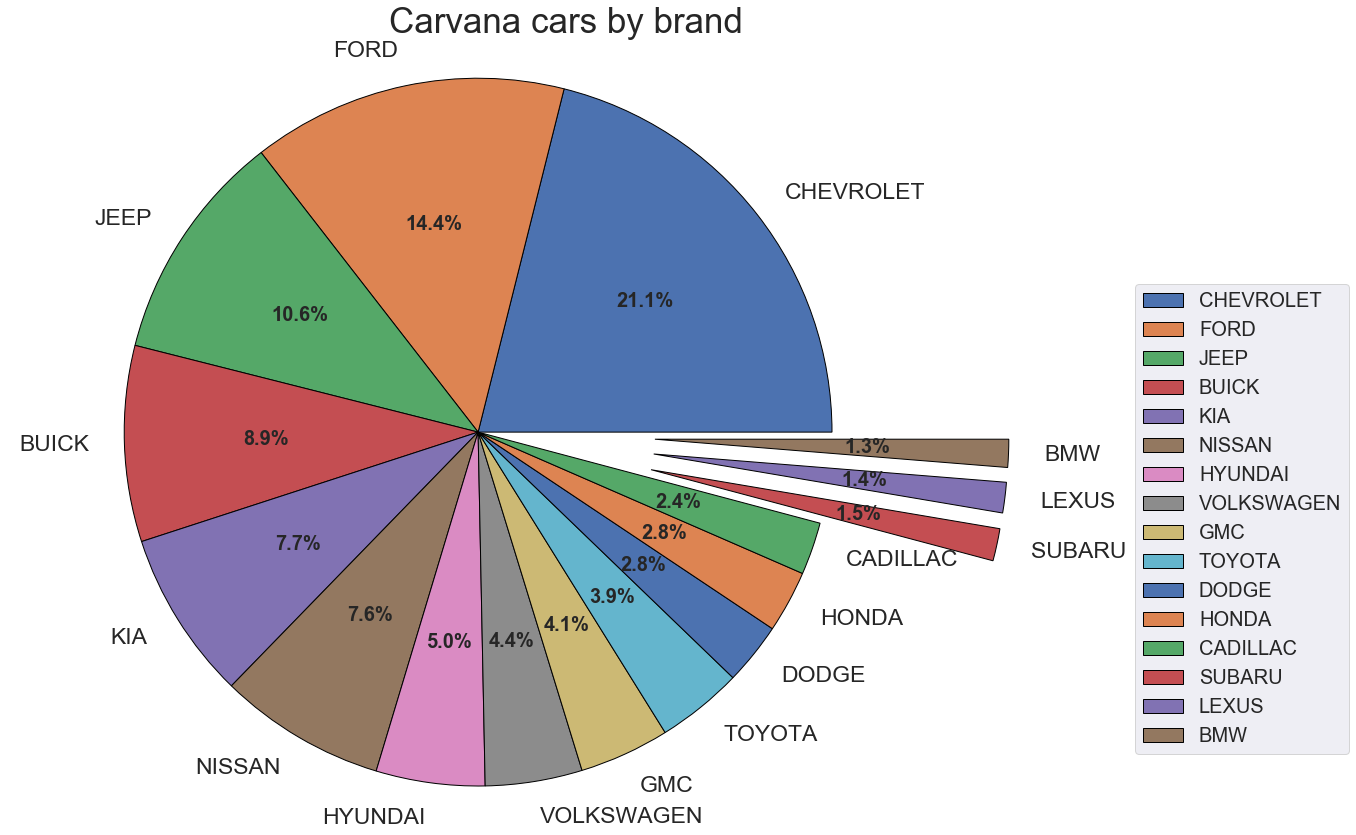

In [18]:

pie=brands.sort_values(by='dummy',ascending=False)

explode=[0.5 if pie['dummy'].values[n]/8610 < .02 else 0.0 for n in range(len(pie.values))]

fig, ax = plt.subplots(figsize=(19,12))
patches, texts, autotexts =ax.pie(pie['dummy'],labels=pie['BRAND'],explode=explode,
                                 wedgeprops={'linewidth':1,'edgecolor':'black'},autopct='%1.1f%%')

fp1=FontProperties(weight='normal',size=23)
fp2=FontProperties(weight='bold',size=20)
for n in range(len(pie.values)):
    texts[n].set_fontproperties(fp1)
    autotexts[n].set_fontproperties(fp2)

ax.axis('equal')
ax.set_title('Carvana cars by brand',fontsize=35,loc='center')
leg=ax.legend(pie['BRAND'],fontsize=20,bbox_to_anchor=(1,0.7))
plt.tight_layout()
plt.show()
fig.savefig('Figures/figure 4 - Carvana cars by brand.tif',bbox_extra_artists=(leg,), bbox_inches='tight')

# regression

have some ideas of how price is affected by the other features

In [58]:
X=cars[['YEAR', 'MILES', 'SHIPPING',
       'CHEVROLET', 'FORD', 'HYUNDAI', 'TOYOTA', 'JEEP', 'VOLKSWAGEN',
       'NISSAN', 'KIA', 'BUICK', 'DODGE', 'HONDA', 'GMC', 'SUBARU', 'CADILLAC', 'LEXUS', 'BMW']]
y=cars['PRICE']

In [67]:
#X=X.drop(7718)
#y=y.drop(7718)

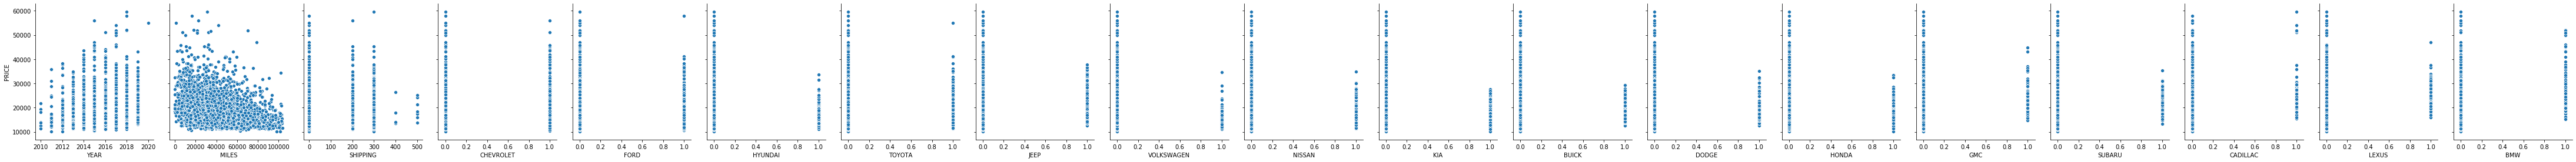

In [5]:
g=sns.pairplot(cars,x_vars=['YEAR', 'MILES', 'SHIPPING',
       'CHEVROLET', 'FORD', 'HYUNDAI', 'TOYOTA', 'JEEP', 'VOLKSWAGEN',
       'NISSAN', 'KIA', 'BUICK', 'DODGE', 'HONDA', 'GMC', 'SUBARU', 'CADILLAC', 'LEXUS', 'BMW'], y_vars='PRICE',aspect=.8, height=4)

g.savefig('Figures/figure 5 - pair plot of x and y variables.tif',dpi=300)

In [70]:
X_train, X_test, y_train, y_test=model_selection.train_test_split(X,y,test_size=0.3)

In [71]:
lr=linear_model.LinearRegression(normalize=True)
lr.fit(X_train,y_train)

train_prediction=lr.predict(X_train)
test_prediction=lr.predict(X_test)

train_mse=metrics.mean_squared_error(y_train,train_prediction)
test_mse=metrics.mean_squared_error(y_test,test_prediction)

print(train_mse**.5)
print(test_mse**.5)

3836.19658219405
4093.544187780218


In [21]:
for n in range(len(X.columns)):
    print(f'Coefficient for {X.columns[n]} \t\t {lr.coef_[n]}')


Coefficient for YEAR 		 322.5717563458428
Coefficient for MILES 		 -0.04331943058359682
Coefficient for SHIPPING 		 -0.5612680205991923
Coefficient for CHEVROLET 		 -1132.607718985986
Coefficient for FORD 		 -1007.4645851589977
Coefficient for HYUNDAI 		 -2170.392485933327
Coefficient for TOYOTA 		 1799.7356813317626
Coefficient for JEEP 		 2289.9209897086703
Coefficient for VOLKSWAGEN 		 -2533.9331556326238
Coefficient for NISSAN 		 -1340.0580780593136
Coefficient for KIA 		 -2066.273293435536
Coefficient for BUICK 		 -1140.2776237891778
Coefficient for DODGE 		 249.49287616820942
Coefficient for HONDA 		 354.6305102460475
Coefficient for GMC 		 1978.2001714048813
Coefficient for SUBARU 		 4166.141607161421
Coefficient for CADILLAC 		 7787.892926077327
Coefficient for LEXUS 		 8307.00253112276
Coefficient for BMW 		 8458.25726720535


## ridge regression

In [10]:
def scorer(model,X,y):
    preds = model.predict(X)
    return metrics.mean_squared_error(y,preds)**.5

In [27]:
alphas = np.linspace(0,.1,101)

In [28]:
MSRE=[]
for a in alphas:
    ridge = linear_model.Ridge(alpha=a,normalize=True)
    msre=model_selection.cross_val_score(ridge, X_train, y_train, cv=10,scoring=scorer)
    MSRE.append(msre.mean())

C:\Users\16142\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.38438e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\16142\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.60921e-17): result may not be accurate.
  overwrite_a=True).T


0.014

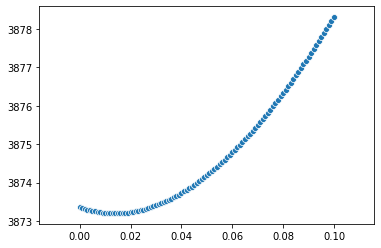

In [32]:
sns.scatterplot(alphas,MSRE)
alpha=alphas[np.argmin(MSRE)]
alpha

In [33]:
#use best alpha value to use Ridge regression on test set
ridge=linear_model.Ridge(alpha=alpha,normalize=True)
ridge.fit(X_train, y_train)
train_pred= ridge.predict(X_train)
test_pred=ridge.predict(X_test)
train_mse=metrics.mean_squared_error(y_train, train_pred)
test_mse=metrics.mean_squared_error(y_test, test_pred)

print(train_mse**.5)
print(test_mse**.5)
#interesting, worse std!
#despite finding a minimum in alpha, hyper parameter alpha is best set to 0.

3872.8635434533176
4062.825724374161


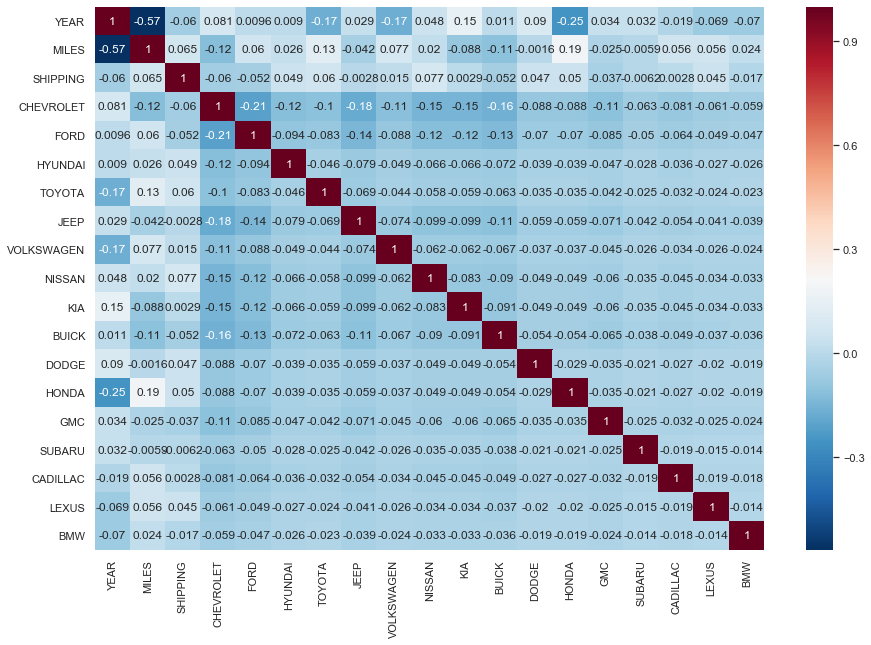

In [36]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(X.corr(),cmap='RdBu_r',annot=True)

In [48]:
alphas=np.linspace(1,10,151)

In [49]:
lassoCV=linear_model.LassoCV(cv=30,alphas=alphas).fit(X_train,y_train)
train_predLCV= lassoCV.predict(X_train)
test_predLCV=lassoCV.predict(X_test)
train_mseLCV=metrics.mean_squared_error(y_train, train_predLCV)
test_mseLCV=metrics.mean_squared_error(y_test, test_predLCV)
print(lassoCV.alpha_)
print(train_mseLCV**.5)
print(test_mseLCV**.5)

1.72
3872.8761503556448
4063.040148898659


In [54]:
ratio=np.linspace(.7,1,11)
alphas=np.linspace(1,5,25)

elasticnetCV=linear_model.ElasticNetCV(cv=30,alphas=alphas,l1_ratio=ratio).fit(X_train,y_train)
train_predENCV= elasticnetCV.predict(X_train)
test_predENCV=elasticnetCV.predict(X_test)
train_mseENCV=metrics.mean_squared_error(y_train, train_predENCV)
test_mseENCV=metrics.mean_squared_error(y_test, test_predENCV)
print(elasticnetCV.alpha_)
print(elasticnetCV.l1_ratio_)
print(train_mseENCV**.5)
print(test_mseENCV**.5)

1.6666666666666665
1.0
3872.8666432174937
4062.9803710145256


question can I cut the brand categories out and get a better or worse result?

In [56]:
X2=cars[['YEAR', 'MILES', 'SHIPPING']]
y2=cars['PRICE']

In [72]:
X2=X2.drop(7718)
y2=y2.drop(7718)

In [73]:
X_train2, X_test2, y_train2, y_test2=model_selection.train_test_split(X2,y2,test_size=0.3)

In [75]:
lr=linear_model.LinearRegression(normalize=True)
lr.fit(X_train2,y_train2)

train_prediction2=lr.predict(X_train2)
test_prediction2=lr.predict(X_test2)

train_mse2=metrics.mean_squared_error(y_train2,train_prediction2)
test_mse2=metrics.mean_squared_error(y_test2,test_prediction2)

print(train_mse2**.5)
print(test_mse2**.5)

4649.663583645885
4615.696992646478


nice, its worse without the categorical columns so they did help.

In [16]:
cars.head()

,YEAR,BRAND,PAGE,ENTRY,PRICE,MILES,SHIPPING,dummy,CHEVROLET,FORD,...,DODGE,HONDA,GMC,SUBARU,INFINITI,MAZDA,CADILLAC,FIAT,LEXUS,BMW
0,2017,HYUNDAI,1,1,14600,24223,300,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2017,KIA,1,2,21400,2948,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2017,HYUNDAI,1,4,15600,34179,300,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2017,NISSAN,1,5,16600,32046,300,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2017,FORD,1,6,21500,41995,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


# K Means Clustering

Lets test to see how well we can find centers and labels for our dataset. Look to identify year of car by price and mileage and brand of car by price and mileage. Start with year. 

replot previous figure

C:\Users\16142\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


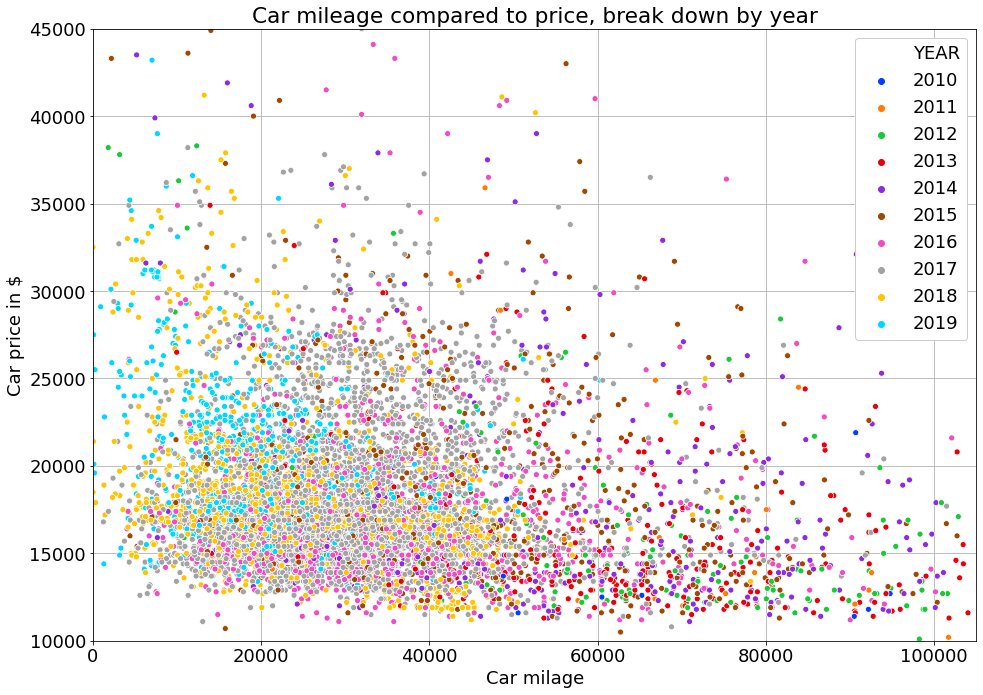

In [45]:

fig, ax = plt.subplots(figsize=(14,10))
palette=sns.color_palette('bright',10)
ax=sns.scatterplot(x='MILES',y='PRICE',data=cars.drop([7718]),hue='YEAR',palette=palette,legend='full')

ax.set_title('Car mileage compared to price, break down by year')
ax.set_xlabel('Car milage')
ax.set_ylabel('Car price in $')
ax.xaxis.grid()
ax.yaxis.grid()
ax.set_xlim([0,105000])
ax.set_ylim([10000,45000])
ax.set_axisbelow(True)
ax.legend(facecolor='white',framealpha=1)
fig.tight_layout()
fig.show()

In [52]:
from sklearn.cluster import KMeans

In [53]:
kmeans=KMeans(n_clusters=10)

In [54]:
df=cars.drop([7718])
YR_kmean_data=df[['MILES','PRICE']].values
YR_kmean_data[:,0]

array([24223,  2948, 34179, ..., 56851, 38894, 96880], dtype=int64)

In [55]:
kmeans.fit(YR_kmean_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

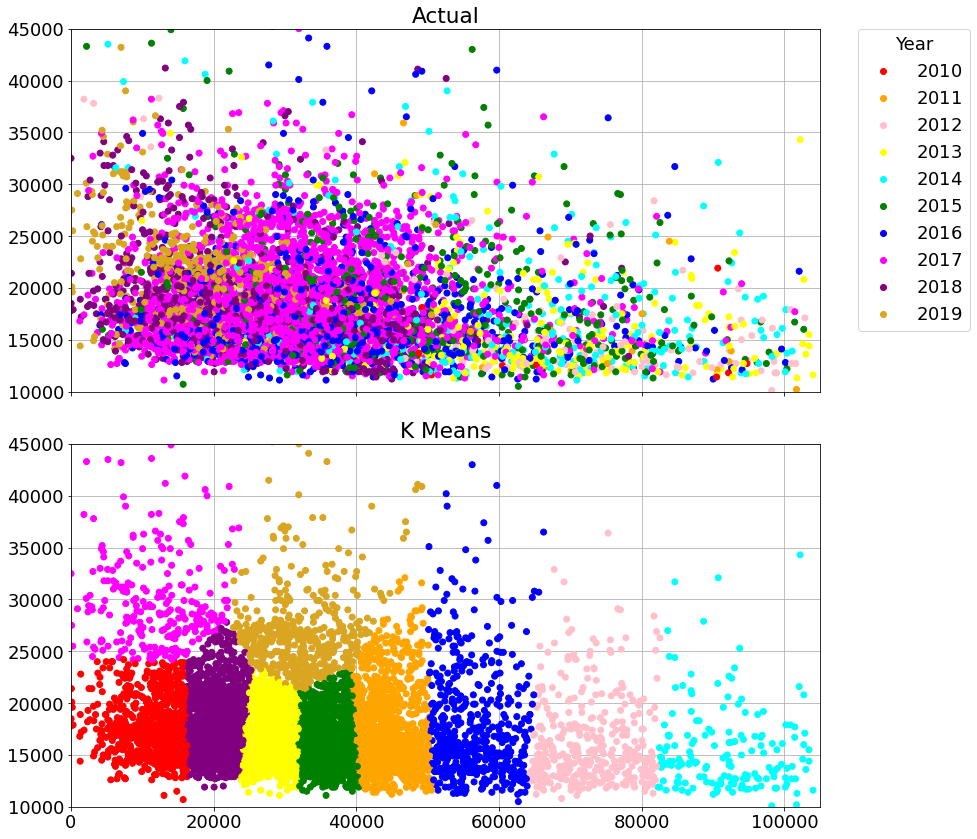

In [56]:

fig, (ax1,ax2) = plt.subplots(2,1,sharex=True,figsize=(14,12))

colors=['red','orange','pink','yellow','cyan','green','blue','magenta','purple','goldenrod']
scatter1=ax1.scatter(df['MILES'],df['PRICE'],c=df['YEAR'],cmap=matplotlib.colors.ListedColormap(colors))

scatter2=ax2.scatter(df['MILES'],df['PRICE'],c=kmeans.labels_,cmap=matplotlib.colors.ListedColormap(colors))

ax1.set_title('Actual')
ax2.set_title('K Means')

legend1=ax1.legend(*scatter1.legend_elements(),title='Year',bbox_to_anchor=(1.2,1),borderaxespad=0.)

ax1.xaxis.grid()
ax1.yaxis.grid()
ax1.set_xlim([0,105000])
ax1.set_ylim([10000,45000])
ax1.set_axisbelow(True)

ax2.xaxis.grid()
ax2.yaxis.grid()
ax2.set_xlim([0,105000])
ax2.set_ylim([10000,45000])
ax2.set_axisbelow(True)

fig.tight_layout()

fig.savefig('Figures/figure 6 - Carvana cars by Year, K means clustering attempt.tif')

terrible! Obviously kmeans only will work on the data fed into it, which is only the price and mileage. Its ineffect a 2d spatial cluster of the 2 variables I provide. If the data is muddled in the two dimesions I'm looking at, such as price and mileage. The K means cluster has no chance of correctly seprerating them. 

In [62]:
kmeansFull=KMeans(n_clusters=10)
df2=df.drop(['BRAND','PAGE','ENTRY','dummy'],axis=1)
kmeansFull.fit(df2.drop('YEAR',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

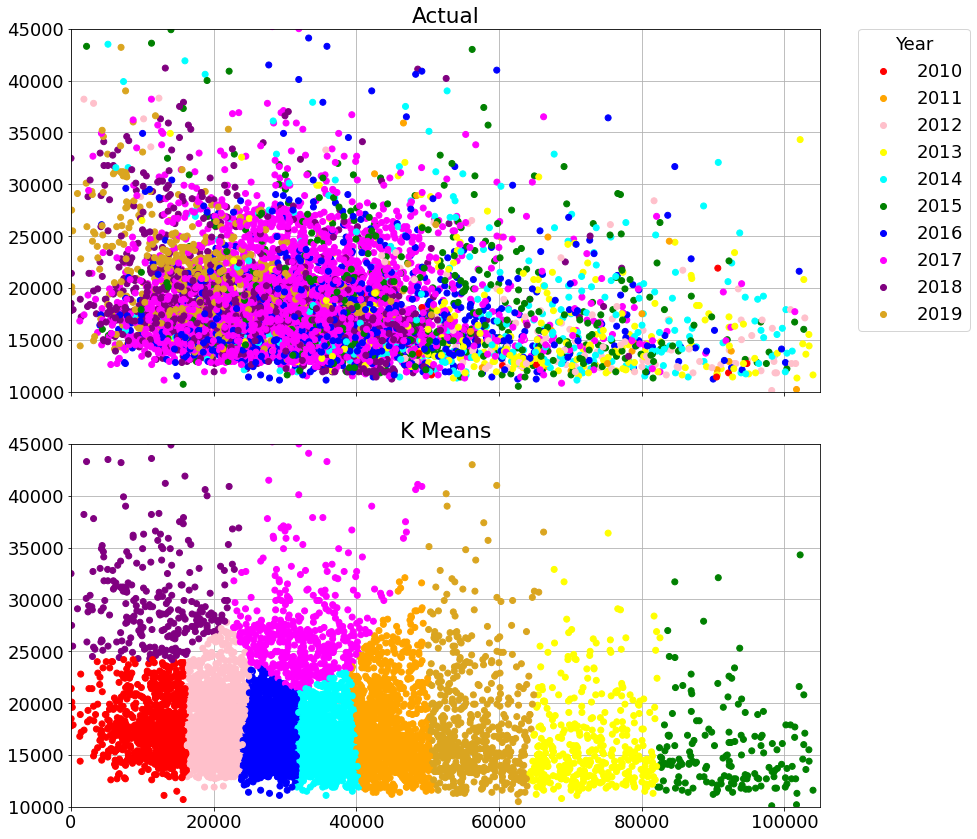

In [63]:
fig, (ax1,ax2) = plt.subplots(2,1,sharex=True,figsize=(14,12))

colors=['red','orange','pink','yellow','cyan','green','blue','magenta','purple','goldenrod']
scatter1=ax1.scatter(df['MILES'],df['PRICE'],c=df['YEAR'],cmap=matplotlib.colors.ListedColormap(colors))

scatter2=ax2.scatter(df['MILES'],df['PRICE'],c=kmeansFull.labels_,cmap=matplotlib.colors.ListedColormap(colors))

ax1.set_title('Actual')
ax2.set_title('K Means')

legend1=ax1.legend(*scatter1.legend_elements(),title='Year',bbox_to_anchor=(1.2,1),borderaxespad=0.)

ax1.xaxis.grid()
ax1.yaxis.grid()
ax1.set_xlim([0,105000])
ax1.set_ylim([10000,45000])
ax1.set_axisbelow(True)

ax2.xaxis.grid()
ax2.yaxis.grid()
ax2.set_xlim([0,105000])
ax2.set_ylim([10000,45000])
ax2.set_axisbelow(True)

fig.tight_layout()

#fig.savefig('Figures/figure 6 - Carvana cars by Year, K means clustering attempt.tif')

No improvement when we include the brand of the cars